<a href="https://colab.research.google.com/github/nyary-ben/Homework-6B/blob/main/Homework6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit-phys-util 1>/dev/null

In [2]:
import pandas as pd
import whit_phys_util as buc
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, exp, sqrt

Mounted at /content/drive


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
repo = buc.local_repository("https://github.com/nyary-ben/Homework-6B")

Cloning repository from GitHub.


# Problem 6.23

### Part a
* The formula to be used with N+1 terms is $Z_{rot,N}$ = $\sum (2j+1)e^{-j(j+1) \epsilon \beta}$ where $\beta$ = $\frac{1}{kT}$.

In [5]:
epsi = 0.00024 #eV
T  = 300 # K
k = 8.617*10**-5 #eV/K
beta = 1/(k*T)

def Z_rot(n_array):
    results = []
    for N in n_array:
        N = int(N)
        Z = 0
        for j in range(N + 1):
            Z += ((2 * j) + 1) * np.exp(-j * (j + 1) * epsi * beta)
        results.append(Z)
    return np.array(results)

(0.0, 120.0)

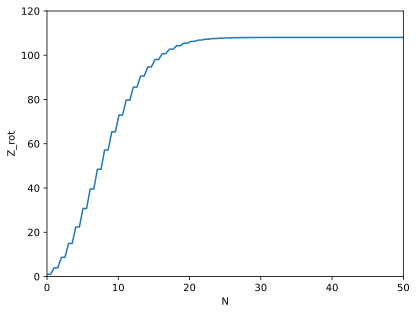

In [6]:
x_vals = np.linspace(1e-9, 50, 100)
y_vals = Z_rot(x_vals)

fig, ax1 = plt.subplots()
ax1.plot(x_vals, y_vals)
ax1.set_xlabel('N')
ax1.set_ylabel('Z_rot')
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 120)


### Part b
* The value of $Z_{rot}$ at $N$ = $50$ is $Z_{rot}$ = $108.05$.

### Part c
* $1 \%$ of $108.05$ = $1.0805$.
* To be within the range of this value, the closest value of $Z_{rot}$ = $1$ which will be at $N$ = $0$.

### Part d
* The high temperature formula is $Z_{rot-high}$ = $\frac {kT}{\epsilon}$.
* The $Z_{rot-high}$ = $107.71$

In [7]:
kT = k * T
Z_rot_high = kT / epsi
print(Z_rot_high)

107.7125


### Part e
* Percent error is $0.32 \%$

In [8]:
PE = (108.05-107.71)/107.71*100
print(PE)

0.3156624268870146


# Problem 6.29

### Part a
* We know that HD molecule is a perfectly harmonic molecule as it has a relatively small moment of inertia.
* So we know that $E_{(s)}$ = $j(j+1)\epsilon$ and $C$ = $\frac{1}{kT^2} \sigma^2$.
* $Z$ = $\sum (2j+1)e^{-j(j+1)\epsilon\beta}$ and $\sigma^2$ = $\frac{1}{Z}\sum\epsilon^2e^{-j(j+1)\epsilon\beta}(2j^5+5j^4+4j^3+j^2)$ - $\frac{1}{Z^2}\sum\epsilon^2e^{-2j(j+1)\epsilon\beta}(2j^3+3j^2+j)^2$.

### Part b

In [9]:
epsi = 0.0057 #eV
k = 8.617*10**-5 #eV/K
def Z(n, Tb):
  Z = 0
  for j in range(2):
    Z += ((2*j)+1)*np.exp(-(epsi*j*(j+1))/(k*Tb))
  return Z

def sigsq(Tb):
  sigsq = 0
  for j in range(2):
      term1 = ((2*j**5 + 5*j**4 + 4*j**3 + j**2) * (epsi**2) * np.exp(-(epsi*j*(j+1)) / (k*Tb))) / Z(2, Tb)
      term2 = ((2*j**3 + 3*j**2 + j)**2 * (epsi**2) * np.exp(-(2*epsi*j*(j+1)) / (k*Tb))) / Z(2, Tb)**2
      sigsq += term1 - term2
  return sigsq
def C(Tb):
  return 1/(k*(Tb**2))*sigsq(Tb)
R = 8.314/(1.602*10**-19) # eV/mol*K
f = 5 #degrees of freedom of diatomic molecule
C_equi = (f*R*2)/(2*(6.022*10**23))

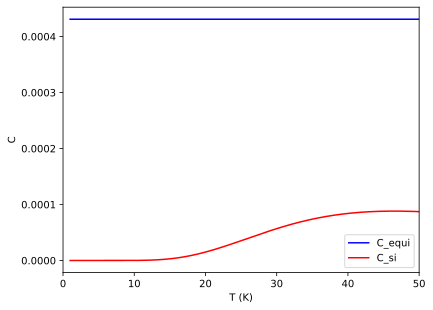

In [10]:
x_vals1 = np.linspace(1, 300, 1000)

fig, ax2 = plt.subplots()

ax2.plot(x_vals1, np.full_like(x_vals1, C_equi), color='blue', label='C_equi')
ax2.plot(x_vals1, C(x_vals1), color='red', label='C_si');
ax2.set_xlabel('T (K)');
ax2.set_ylabel('C');
ax2.set_xlim(0, 50);
ax2.legend();


### Part c
* I would guess the answer to be around 45K as that would be where the peak of $C_{si}$ would be. I know that the graph should look like the two lines cross each other and assuming that my $C_{si}$ would have an arithmetic error, I would make an estimated guess.

# Problem 6.33
The Maxwell distribution of speeds for an ideal gas like $O_{2}$ molecule is
$$D(v) = \frac{4}{\sqrt{\pi}} v^2 e^{-v^2}$$
where $v$ is in units of $v_0 = \sqrt{2kT/m}$

In [31]:
def D(v):
  return 4/sqrt(pi)*v**2*exp(-v**2)
k3 = 1.381*10**-23 # J/K
T3 = 300 #K
m = 0.036 #kg
v_0 = np.sqrt((2*k3*T3)/m) #m/s

### Most probable speed

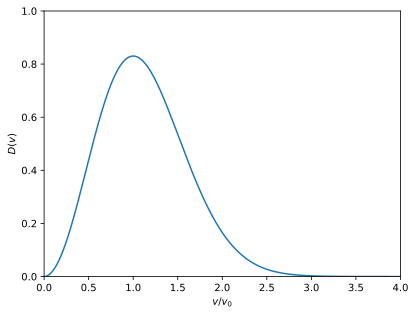

In [32]:
fig, ax = plt.subplots()
v = np.linspace(0,4,1000)
ax.plot(v,D(v));
ax.set_xlabel('$v/v_0$');
ax.set_ylabel('$D(v)$');
ax.set_xlim(0,4);
ax.set_ylim(0,1);

* Most problable speed occurs where the slope of the curve is 0.

In [33]:
from scipy.optimize import minimize_scalar
vmp1 = minimize_scalar(lambda v: -D(v), bounds=(0,4)).x
vmp = vmp1*v_0
print(f'The most probable speed is {vmp} m/s')

The most probable speed is 4.797568674393875e-10 m/s


### Average speed
* This occurs at the integral of $vD(v)$ over 0 to infinity.

In [34]:
from scipy.integrate import quad
integral_results = quad(lambda v: v*D(v),0,np.inf)
vavg1 = integral_results[0]
vavg = vavg1*v_0
print(f'The average speed is {vavg} m/s')

The average speed is 5.413476719076904e-10 m/s


### RMS speed
* This occurs at the square root of the integral of $v^2D(v)$.

In [35]:
vrms1 = sqrt(quad(lambda v: v**2*D(v),0,np.inf)[0])
vrms = vrms1*v_0
print(f'The rms speed is {vrms} m/s')

The rms speed is 5.875797818169035e-10 m/s


# Problem 6.34
$$D(v) = (\frac{m}{2\pi kT})^{1.5} 4\pi v^2 e^{-\frac{mv^2}{2kT}}$$

In [38]:
m_ni = 0.028 #kg
T_ni1 = 300 #K
T_ni2 = 600 #K

def D(v):
  return 4/sqrt(pi)*v**2*exp(-v**2) #to be changed